# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case. 

In this section we consider a binary Markov random field (taking values in $ E=\{0,1\}$). 
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [1]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

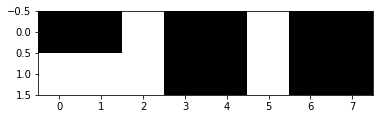

In [2]:
plt.set_cmap('gray')
 
sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

# Q1 
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



$ \displaystyle{U(x) = \sum_{c=(s,t) \in C}{ \beta 1_{x_s \ne x_t}  }}$

In [3]:
def energy_locale(imaU,i,j, beta):
    res = 0
    try :
        if imaU[i][j] != imaU[i+1][j] : 
            res += beta
    except IndexError : pass
    try :
        if i-1>=0 and imaU[i][j] != imaU[i-1][j] : 
            res += beta
    except IndexError : pass
    try :
        if imaU[i][j] != imaU[i][j+1] :
            res += beta
    except IndexError : pass
    try :
        if j-1 >= 0 and imaU[i][j] != imaU[i][j-1] :
            res += beta
    except IndexError : pass
    print(f"{i = } {j = } {res = }")
    return res
    
    
def globalEnergy (imaU, beta):
    h, w = imaU.shape
    e = 0
    for i in range(h):
        for j in range(w):
            temp = energy_locale(imaU,i,j,beta)
            #print(i,j,temp)
            e += temp
    return e/2 #On a compté chaque clique deux fois

In [4]:
globalEnergy(imaU,1)

i = 0 j = 0 res = 1
i = 0 j = 1 res = 2
i = 0 j = 2 res = 2
i = 0 j = 3 res = 1
i = 0 j = 4 res = 1
i = 0 j = 5 res = 2
i = 0 j = 6 res = 1
i = 0 j = 7 res = 0
i = 1 j = 0 res = 1
i = 1 j = 1 res = 1
i = 1 j = 2 res = 1
i = 1 j = 3 res = 1
i = 1 j = 4 res = 1
i = 1 j = 5 res = 2
i = 1 j = 6 res = 1
i = 1 j = 7 res = 0


9.0

#A1 


1.0


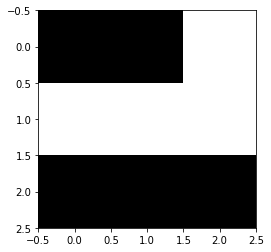

In [5]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
#imaVois = np.zeros((3,3))
plt.imshow(imaVois,cmap='gray')
print(imaVois[1,1])

#Q2 

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


De manière générale on a $\displaystyle{ P(X_s = x_s | X^s = x^s) = \frac{\exp( -U_s(x_s|V_s))}{\sum_{x_s \in E} \exp(-U_s(x_s|V_s))}   } $ où on a 
$\displaystyle{ U_s = \sum_{c \in C \space / \space s \in c} U_c(x_s,V_s)}$

In [6]:
def us_list(imaVois, beta, valpixelcentre):
    mm = beta * ( int(imaVois[0][0] != valpixelcentre) + int(imaVois[0][1] != valpixelcentre) + int(imaVois[0][2] != valpixelcentre) + int(imaVois[1][0] != valpixelcentre) + int(imaVois[1][2] != valpixelcentre) + int(imaVois[2][0] != valpixelcentre) + int(imaVois[2][1] != valpixelcentre) + int(imaVois[2][2] != valpixelcentre)   )
    return mm

def prob_cond (imaVois, beta):
    us_xs = us_list(imaVois,beta,imaVois[1][1])
    us0 = us_list(imaVois,beta,0)
    us1 = us_list(imaVois,beta,1)
    prob = np.exp(-us_xs) / ( np.exp(-us0) + np.exp(-us1) )
    print("On a une probabilité de", prob, " d'avoir le pixel central qui vaut", imaVois[1,1])
    return prob
                
    

In [7]:
prob_cond(imaVois,1)

On a une probabilité de 0.11920292202211755  d'avoir le pixel central qui vaut 1.0


0.11920292202211755

#A2


## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models 



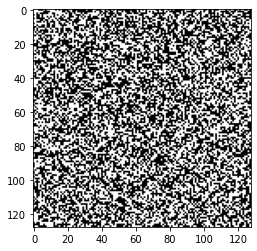

In [8]:
plt.set_cmap('gray')
 
sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [9]:
def echan(im_bin,beta_reg, regular=1,potts_repu=0,potts_attrac=0):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
            a,b,c,d = im_bin[i1,j],im_bin[i2,j],im_bin[i,j1],im_bin[i,j2]
            
            Ureg0, Ureg1 = 0, 0
            
            if regular:
            # complete the calculation of energies and associated probabilities 
            # energy and non-normalized proba when the pixel is put in class 0
                Ureg0 += ((a)%2 + (b)%2 + (c)%2 + (d)%2)
            # energy and non-normalized proba when the pixel is put in class 1
                Ureg1 += ((a+1)%2 + (b+1)%2 + (c+1)%2 + (d+1)%2)
            
            if potts_repu:
                #Modèle de Potts attractif only horizontal
                if c == 0 :
                    Ureg0 += -1
                else:
                    Ureg1 += -1
                    
                if d == 0 :
                    Ureg0 += -1
                else:
                    Ureg1 += -1 
                  #Modèle de Potts répulsif vertical
            if potts_attrac:
                if a == 0 :
                    Ureg0 += 1
                else:
                    Ureg1 += 1
                    
                if b == 0 :
                    Ureg0 += 1
                else:
                    Ureg1 += 1    
                    
            Ureg0 *= beta_reg
            Ureg1 *= beta_reg
            p0=math.exp(-Ureg0);
            p1=math.exp(-Ureg1);
        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1


    return im_bin

 
By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

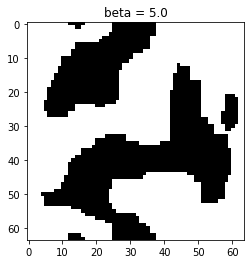

In [10]:
lbeta = np.linspace(5,5,num=1)
sh=[64,64]
im_bin0=2-np.ceil(2*np.random.rand(*sh))
#plt.imshow(im_bin0)
#plt.title("image de base")
#plt.show()
for beta_reg in lbeta :
    # random initialization of im_bin
    #plt.set_cmap('gray')
    #im_bin=2-np.ceil(2* [[1 for _ in range(128)] for _ in range(64)])
    #plt.imshow(im_bin)

    #mafigure=plt.figure()
    #plt.imshow(im_bin);        
    #mafigure.canvas.draw()
    #plt.show()
    im_bin = np.copy(im_bin0)
    for n in range(20):  
        echan(im_bin,beta_reg,regular=1,potts_repu=0,potts_attrac=0) 
        #plt.imshow(im_bin)      
        #mafigure.canvas.draw()
        #plt.show(block=False)


    #plt.figure()
    plt.imshow(im_bin,cmap='gray')
    plt.title("beta = " + str(beta_reg))
    plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

L'image obtenue n'est jamais la même car on fait un tirage aléatoire pour savoir si on modifie la valeur des pixels à chaque itération

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results. 

Il semble que passé un certain seuil, modifier la valeur de beta ne change pas beaucoup le résultat. La régularisation sera similaire. Cela est du aux fonctions exponentielles qui dépendent de beta.

#Q5 
Which image minimizes the overall energy for this model? 

Vu le modèle choisi, une image uniforme va minimiser l'énergie. Elle sera même nulle.


#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

Lorsque que l'on a beta négatif on voit que l'image tend vers une alternance quasi parfaite de pixels blancs et noirs. En effet c'est équivalent à supprimer le "-" dans l'exponentiel des probabilités, on inverse alors la dynamique de la densité de probabilité. De ce fait on va alors uniquement réaliser des changements qui vont alors augmenter l'énergie de l'image.

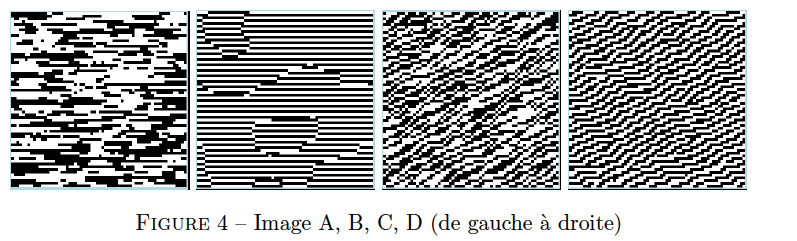

#Q7 
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero. 


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.





Image A : On ne considère là que les pixels à gauche et droite et le potentiel est mis à -1 s'ils sont égaux.

Image B : puisque que l'on voit qu'il y a encore plus de lignes horizontales, on ne considère encore que les pixels sur les cotés mais cette fois on met le potentiel à 1 s'ils sont différents #faux, on met à 1 les pixels en haut et en bas s'ils sont égaux, de sorte que l'énergie minimale soient atteinte pour des lignes alternées

Image C : On voit qu'il y a des diagonales. On ne considère alors que les pixels situés sur la diagonale qui va de en bas à gauche vers en haut à droite. Le potentiel est mis à -1 si les pixels sont égaux.

Image D : Identiquement il y a plus de diagonales. Donc en considérant les mêmes pixels on met cette fois le potentiel à 1 s'ils sont différents. # Faux cf image B

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). Comment on the result. 

In [11]:
def echan_ising (im_bin, beta_reg):
    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            a,b = im_bin[i1,j2],im_bin[i2,j1]            
            
            #Ureg0= ((a)%2 + (b)%2)*beta_reg
            Ureg0 = 0
            if a != 0 : Ureg0 += beta_reg
            #else : Ureg0 -= beta_reg
            if b != 0 : Ureg0 += beta_reg
            #else : Ureg0 -= beta_reg
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            #Ureg1= ((a+1)%2 + (b+1)%2 )*beta_reg
            Ureg1 = 0
            if a != 1 : Ureg1 += beta_reg
            #else : Ureg0 -= beta_reg
            if b != 1 : Ureg1 += beta_reg
            #else : Ureg1 -= beta_reg
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0
                else :
                    im_bin[i,j]= 1


    return im_bin

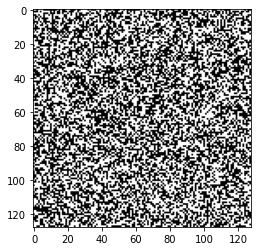

<Figure size 432x288 with 0 Axes>

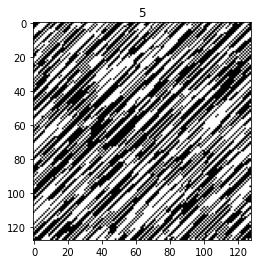

In [12]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
#im_bin=2-np.ceil(2* [[1 for _ in range(128)] for _ in range(64)])
plt.imshow(im_bin)

mafigure=plt.figure()
#plt.imshow(im_bin);        
mafigure.canvas.draw()
plt.show()

beta_reg = 5

for n in range(20):  
    echan_ising(im_bin,beta_reg) 
    #plt.imshow(im_bin)      
    mafigure.canvas.draw()
    #plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.title(beta_reg)
plt.show()

On voit donc bien que l'on a régularisé l'image selon la diagonale choisie.